<a href="https://colab.research.google.com/github/hwang-sudang/FBA_DSAlgorithm/blob/master/27%2C28_%EA%B7%B8%EB%9E%98%ED%94%84%EC%9D%B4%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 27. 그래프 이론
### 그래프란?
현실세계의 사물이나 추상적인 개념 간의 **연결관계**를 표현.
- 정점 vertex : node. 
- 간선 edge : 각 노드를 잇는 선. 연결 정보.


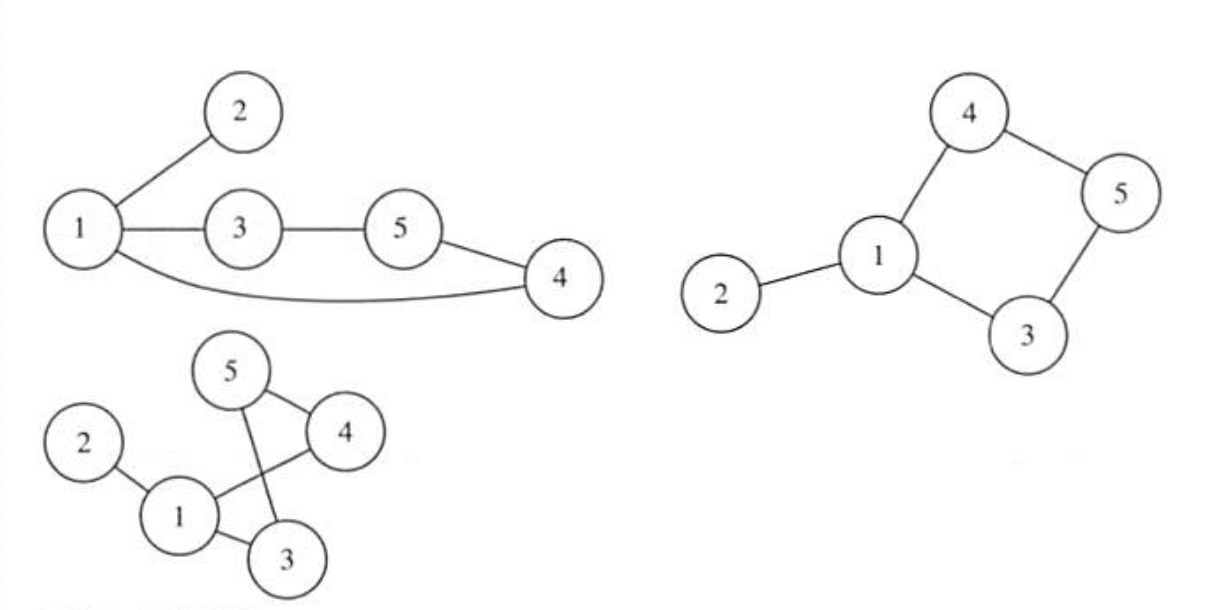

### 방향그래프, 유향그래프
- 각 간선이 방향이다. 즉, v->u, u->v 로 가는 간선은 서로 다른 간선.

### 가중치 그래프
- 각 간선에 가중치(weights)라고 불리는 실수 속성.
- 두 도시 사이의 거리, 두 물건 사이의 교환 비율, 두 사람의 호감도 등의 다양한 정보를 표현하는 데 사용

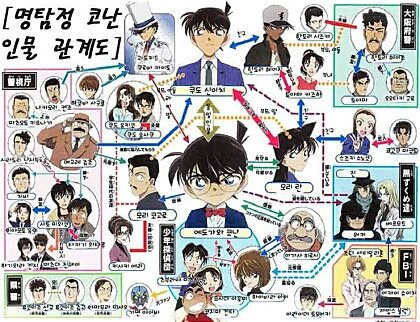

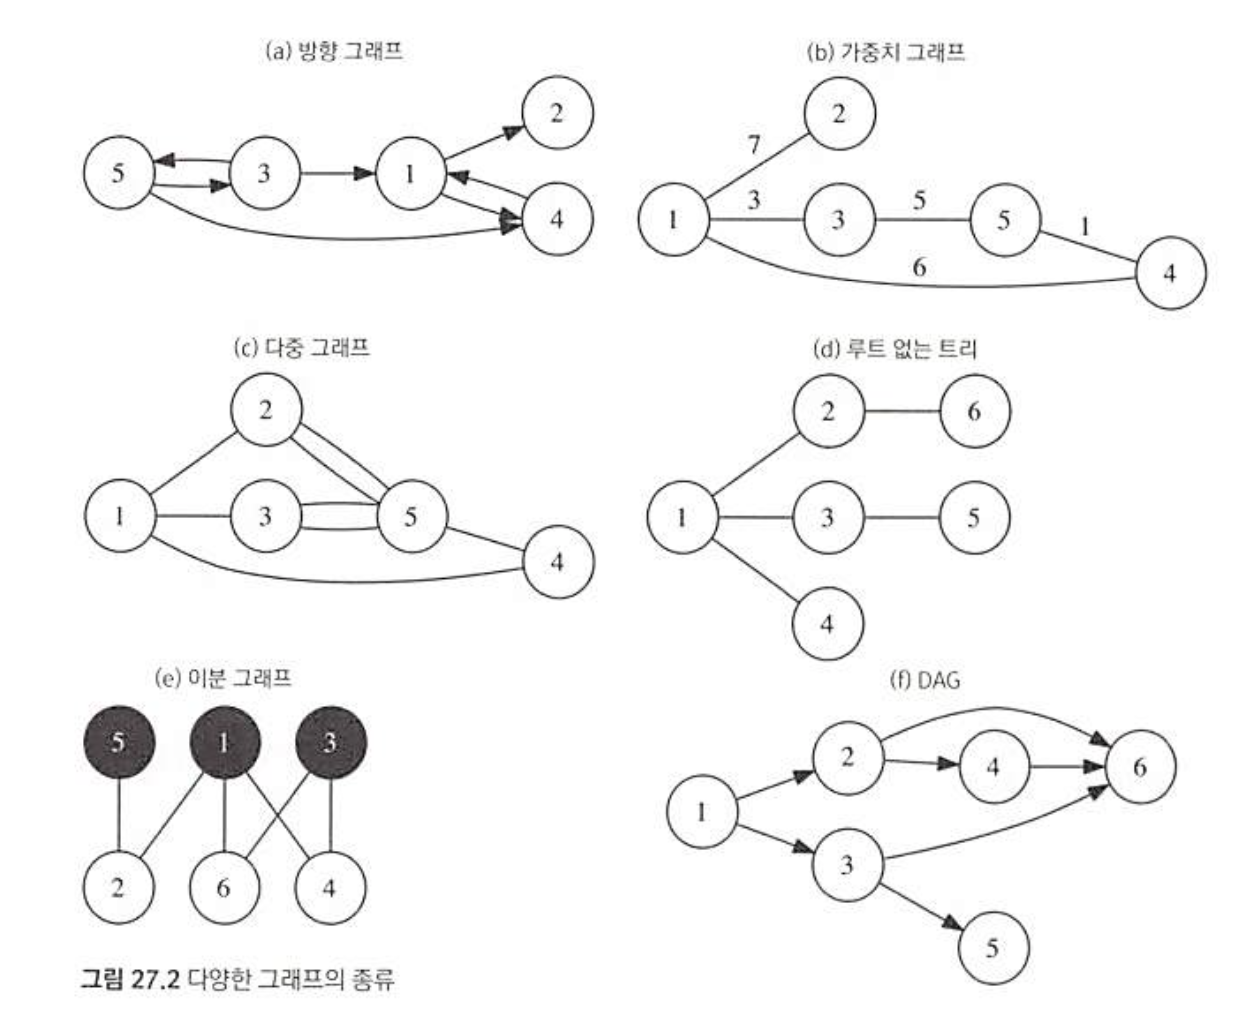

## 다중그래프
두 정점 사이에 2개 이상의 간선이 있는 경우.
형태에 따라 다양한 그래프가 존재한다.

- 루트없는 트리 : 부모자식 관계가 없을 뿐, 간선 간의 관계만 보면 트리와 같은 무향그래프. 트리와 비슷하다는 뜻은 결국 두 정점을 잇는 방법이 딱 하나 뿐임을 의미.

- 이분그래프 : 그래프의 정점들을 겹치지 않는 2개의 그룹으로 나눠 서로 다른 그룹에 속한 정점들 간에만 간선이 존재하도록 만들 수 있는 그래프. 
  - ex) 이성애자 그룹이라고 할 때, 남, 여 그룹간의 애정전선...<3

- DAG, Directed Acyclic Graph : 방향그래프지만 자기 자신에게 돌아오는 경로, 즉 사이클이 없는 경우.

## 경로
- 단순 경로 : 한 정점을 한 번만 지나가는 경로
- 사이클 : 시작한 점에서 끝나는 경로. 회로라고도 한다.



# 암시적 그래프 구조들
현실세계에서 그래프 같은 형태를 갖는 구조가 아니라도 그래프를 통해서 표현하면 쉽게 해결할 수 있는 문제들.

ex) 할일 목록 정리, 게임판 덮기**, 회의실 배정
* 게임판 덮기 : 게임판의 모든 칸에 블록을 놓을 수 있는 것이 아니라 일부는 막혀있다. 블록을 겹쳐서 놓을 수는 없을 때 막히지 않은 모든 칸에 놓을 수 있는 방법 모색. -> 이분 그래프. 

* 만족성 문제 : 모든 사람이 두 선택지 중 하나를 선택해야 하는. (2-SAT) , 강 결합성 문제로 풀어나간다...







# 그래프의 표현 방법 : 인접행렬, 인접리스트
- 그래프는 트리보다 훨씬 정적인 구조로 이루어져 있다. 즉 새로운 정점이나 간선을 삭제거나 새로 생성하지 않는다.
- 각 정점에 0부터 시작하는 번호를 붙이고, 배열에 각 정점의 정보를 저장하는 것.
- 각 간선은 반대쪽 끝 정점 객체의 번호를 저장



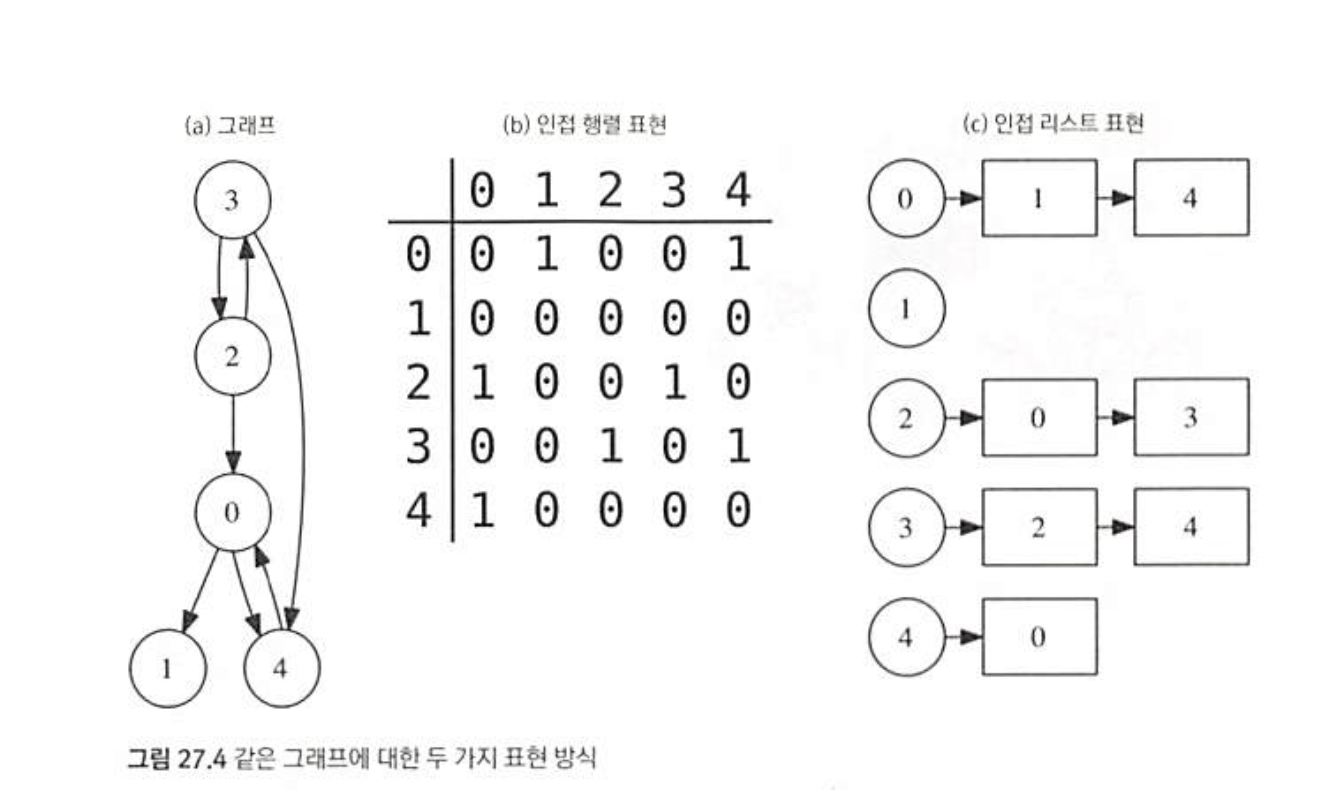



### 인접리스트
그래프의 각 정점마다 해당 정점에서 나가는 간선의 목록을 저장해서 그래프를 표현
- [(2,3),....] : 2노드 -> 3노드
- 인접리스트는 비록 간선(u,v)가 존재하는 지 확인하기 위해서는 연결리스트 adj(U)를 처음부터 읽어가면서 각 원소를 일일히 확인해야 한다.


### 인접행렬
2차원 배열을 이용하여 간선의 정보를 저장한다. 보통은 True, False로 각 원소를 저장해 연결관계를 표현한다.
- 인접행렬은 한번의 배열 접근만으로 두 정점이 이어져 있는지 확인할 수 있다.
- 그러나 인접행렬 표현은 V*V 크기의 2차원 배열이므로, O(V^2) 크기의 공간을 항상 사용한다는 문제점이 있다.

따라서
- 밀집그래프(dense graph) : 간선의 갯수가 V^2 와 비례하는 그래프 --> 인접행렬
- 희소그래프(sparse graph) : 간선의 갯수가 훨씬 적다면 --> 인접리스트



# 28. 그래프의 깊이 우선 탐색.
- 모든 정점을 특정한 순서에 따라 방문하는 알고리즘 -> 그래프의 탐색알고리즘

> **탐색 알고리즘의 양대산맥 : DFS, BFS**

# DFS 깊이 우선 탐색



## 위상정렬
> 의존성이 있는 작업들이 주어질 때 이들을 어떤 순서로 수행해야 하는지?

ex) 된장찌개 끓이기.

### 의존성그래프 (dependencty graph)
- 작업 v가 u에 의존한다면, 의존성 그래프는 간선 (u,v)를 포함한다.
- 의존성 그래프는 절대로 "사이클"이 있을 수 없다. (DAG)
- DAG의 정점을 배열하는 문제를 **위상정렬**이라고 한다.
- ** 일방통행 **만 가능.





## HOW 2 Solve?
1. dfsAll()애서 dfs()가 종료할 때 마다 현재 정점의 번호를 기록하는 방식으로 해결하기. 
2. 끝난 후 reverse 하면 위상정렬의 결과 도출.

### 위상정렬 중 역행하는 간선이 있다면?
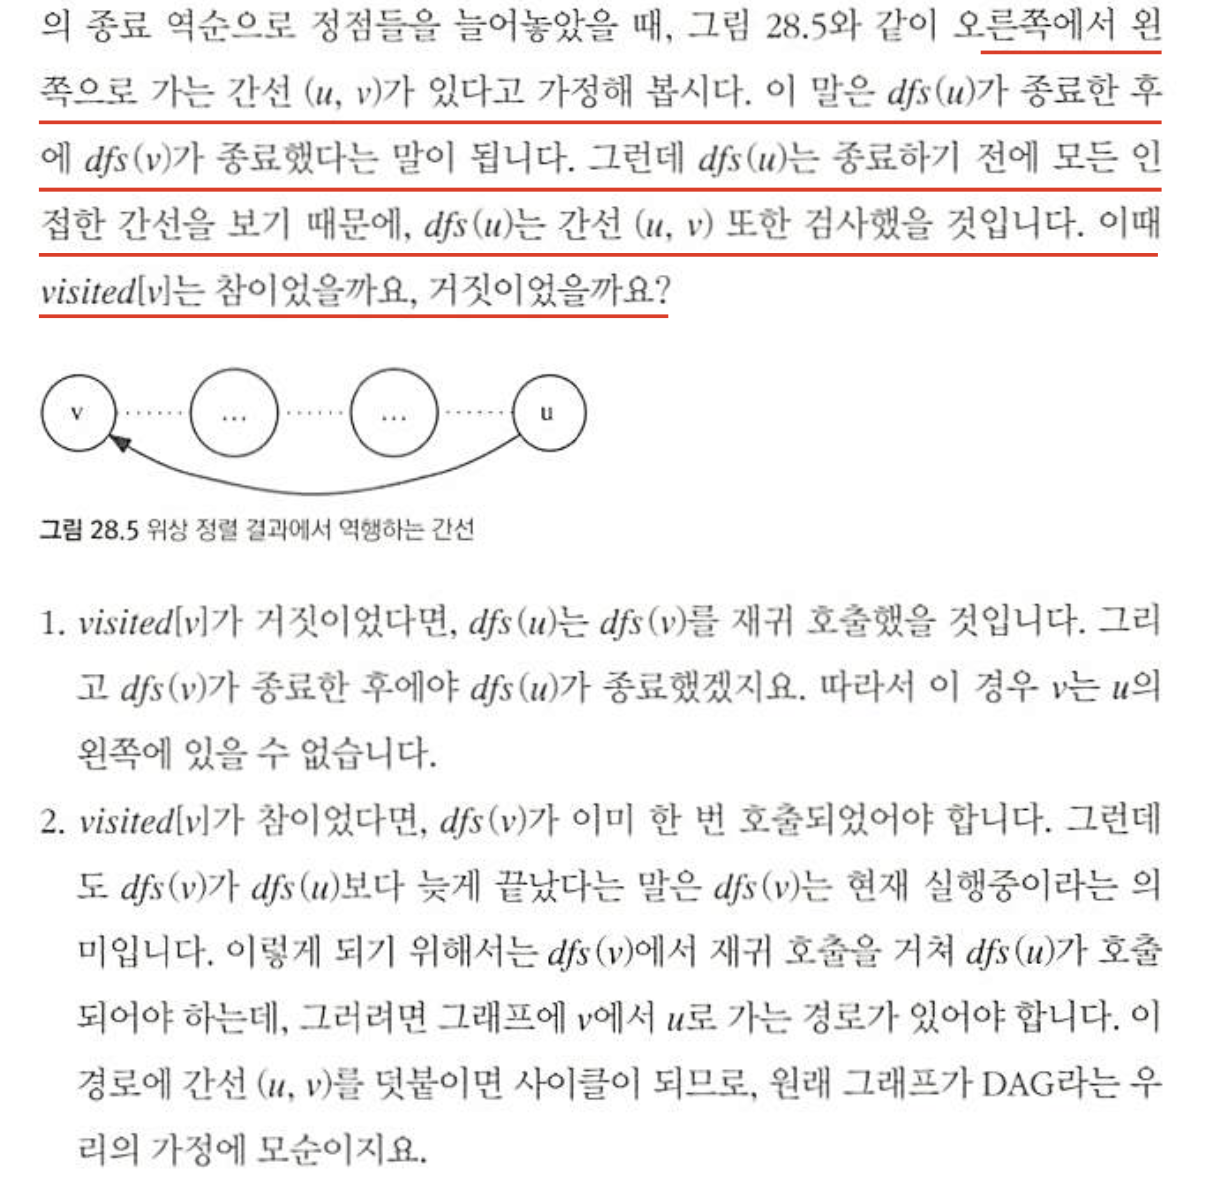



# 고대어 사전
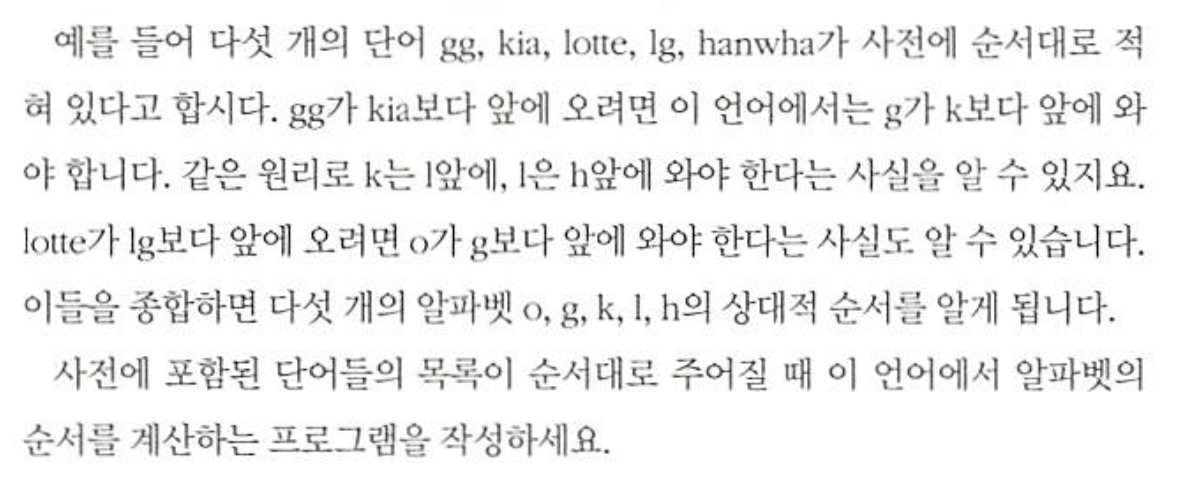

## 해결 방법
**-- 인풋 틀 만들기**
1. 26*1 인  visited를 만든다. 그리고 각 정점과 간선정보를 알려줄 인접행렬 26*26도 만든다.  기본적으로 모든 원소는 0

**-- 위상정렬 정보를 기록하는 함수 만들기**
2. **인접단어만 계산** 우선 i 번째 단어와 i-1 번째 단어의 철자를 함께 비교한다.
이때, 포문 돌릴때 길이는 둘 중 짧은 단어 기준으로 포문을 돌리길.
3. 철자가 다른 뽀인트를 발견하면 --> 인접행렬의 해당주소에 1을 기록.

**-- 위상정렬의 구현**
4. 이 그래프에 사이클이 있는지 확인하고, 없으면 위상정렬 결과를 반환한다. -> 오른쪽에서 왼쪽 (역행)하는 간선이 존재하는 지 확인하자. 
  * dfs()함수로 구현하고 (using 재귀함수)
  * order =[]에 dfs가 종료했던 순서를 기록할 수 있는 틀 만들기. 

5. 4를 위해서 dfs가 종료했던 순서를 기록하고, 이 순서를 뒤집는다.


**이 알고리즘은 O(nL)의 수행시간을 갖는다.**
- n : 단어의 개수
- L : 단어의 길이


In [2]:
# 1. 인풋 틀 만들기
# import sys
from collections import defaultdict

num_words = int(input()) # 단어 몇개 들어오니
words = []

for _ in range(num_words):
  words.append(input())

words

3
ba
aa
ab


['ba', 'aa', 'ab']

In [19]:
graph = defaultdict(set)
visited = {} #왜 파이썬으로는 굳이 이렇게 하는 지 생각..
adj = [[0]*26]*26



In [18]:
# def dfs
def dfs(vertex): # vertex는 visited key 이며, visited의 key 는 알파벳이다.
  global flag
  visited[vertex] = False  # 현재 방문한 정점을 False로 바꾼다

  adjacent = graph[vertex] # graph[정점]에 있는 밸류를 adjacent로 

  for node in adjacent : 
    if visited[node] is False: # 방문한 정점을 또 방문한 상황 --> 회로
      flag = False # 플래그가 false로 바뀌면 INVaLID HYPOTHESIS
    elif visited[node] is not None: #None이 아니라면 --> 뒷순서에 임의의 알파벳 순서가 정의되지 않은 상황
      dfs(node) # False가 될때까지 찾아라. 

  sequence.append(vertex)
  visited[vertex] = True




In [20]:
#  make graph
prev ='' # 단어도 이렇게 빈칸에 끼워맞출 수 있다!
for word in words:
  for i in range(min(len(prev), len(word))):
    if prev[i]!=word[i]:
      graph[prev[i]].add(word[i]) # graph {'':'a'} 이런 식으로 달리나 본데 
      visited[prev[i]] = None  # visited {' ':None} 이런 꼴로 들어간다.
      visited[word[i]]=  None
      break
  prev = word # 작은 포문 끝나면 prev = 새로운 word로 갱신된다.



In [21]:
# dfs all
import string

answer = []

# 일단 visited에 들어갔다는건, 앞뒤로 정렬할 무언가가 있다는 것... 재정렬 검토대상
for vertex in visited.keys(): 
  if visited[vertex] is None: 
    sequence = []
    flag = True

    dfs(vertex)

    if flag :
      answer.extend(sequence) # flag = True, 재정렬
    else :
      break # false면 새로운 answer에 들어갈 필요 X.

  if flag:
    alphabets = [ a if a not in answer else "" for a in string.ascii_lowercase]
    answer.reverse()
    answer="".join(answer + alphabets)
    print(answer)
  else :
    print("INVALID HYPOTHESIS")


bacdefghijklmnopqrstuvwxyz


In [16]:
print(graph, visited) 

defaultdict(<class 'set'>, {'b': {'a'}, 'a': {'b'}}) {'b': True, 'a': True}


https://junho-one.tistory.com/26


# 오일러 서킷, 오일러 트레일
- 모든 간선을 한번식만 지나는 경로를 찾는 문제인 오일러 트레일, 서킷을 찾는 문제로 해결해야 한다.





### **1. 오일러 서킷**
: 모든 간선을 한번씩만 지나 시작정점으로 되돌아오는 경로. 깊이 우선 탐색처럼 재귀호출로 구현햔다.

> 1) findRandomCircuit(u)는 u와 인접한 간선들을 하나하나 검사하면서, 아직 방문하지 않은 간선 (u,v)가 있다면 또 다시 findRandomCircuit(u)를 호출한다.


>  2) 더 이상 따라갈 간선이 없으면 재귀호출을 멈추고 반환합니다. 재귀호출이 종료하는 순간, 지금까지 따라온 간선들을 모으면 하나의 서킷.


>  3) 서킷 안에서 아직 지나지 않은 간선이 남아 있는지 확인해야 한다.

>  4) 재귀 호출 반환과정은 지금까지 지나온 정점들을 방문했던 역순으로 하나하나 지나므로, 이 과정(재귀호출) 에서 지나지 않은 간선이 남아있나 확인. 


>  5) 만약 남아 있는 정점이 있다면 새 서킷을 만들어 가운데 끼워 넣는다.



**- 전제 : 시작 정점은 나가는 간선의 개수가 들어오는 간선의 개수보다 1개 많아야하고,**


**- 끝 정점은 들어오는 간선의 개수가 나가는 간선의 개수보다 1개 많아야 한다. ****




### **2. 오일러 트레일**
: 모든 간선을 한번씩만 지나 시작 정점과 다른 정점에서 끝나는 경로.


ex) 점 a -> b 끝나는 오일러 트레일을 찾고 싶다. 이때 간선 (b,a)를 추가한 뒤 *오일러 서킷* 을 찾는다.

- 기본 전제 : 각 정점에 들어오는 간선과 나가는 간선의 갯수가 같아야 한다.










# 끝말잇기
1. 정점이 각각의 단어들이 되고, 끝말잇기가 가능한 단어들끼리 잇는 방법


2. 정점을 각 단어의 시작 알파벳과 끝 알파벳으로 두고 간선을 시작알파벳에서 끝 알파벳 방향으로 잇는다.


###2번 방법을 활용해야 연산량이 줄어든다. O(VE)
- 모든 간선을 한번씩만 지나는 경로를 찾는 문제인 오일러 트레일, 서킷을 찾는 문제로 해결해야 한다.

- 문제를 해결하기 위해서는 먼저 입력값을 받아 그래프를 만들어 오일러 서킷이나 트레일이 존재하는지 판단하기.
- 만약 오일러 서킷이 존재한다면 아무 정점에서나 시작하면 된다.
- 오일러 트레일이 존재한다면 시작 정점을 찾아 그 정점에서 시작

### 해밀토니안 경로
-  모든 정점을 정확히 한 번씩 지나가는 경로
-  아직까지는 "조합탐색" 방법론으로 진행
-  모든 정점의 배열을 하나하나 시도하며 이들이 경로가 되는 지 확인하는 것.
-  최악의 경우 n! 개의 후보를 만들어 봐야 한다.
> 입력에 주어진 각 **단어**를 정점이 아니라 **간선** 으로!

이 그래프의 정점들은 알파벳의 각 글자를 표현하며, 각 단어는 첫 글자에서 마지막 글자로 가는 간선이 된다. 이 그래프의 오일러 트레일 또는 서킷을 찾으면 원래 문제의 답이 될 수 있다.

사진 (b)처럼.
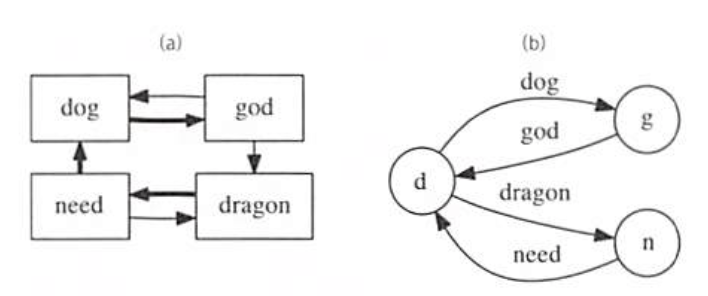

### 코드는 따로 업로드
출처 : https://junho-one.tistory.com/27

In [33]:
import sys
import copy

# 인풋
N = int(input())
words={}
graph={}
in_edge={}
out_edge={}
visited={}


3
